# IS362 Fall 2019 Week08 Assignment - Koon Tse

##### 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
##### 2. Review the data and the provided data set description.
##### 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
##### 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
##### 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
##### 6. Create a bar chart that shows the distribution for cylinders.
##### 7. Create a scatterplot that shows the relationship between horsepower and weight.
##### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

##### Import library modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

##### Load Auto-MPG data set into pandas DataFrame and labeled the column headers

In [3]:
auto_column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin', 'Car Make/Model']
auto_df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header= None, names= auto_column_names)
column = auto_df.columns.tolist()
column = column[-1:] + column[:-1]
auto_df = auto_df[column]
auto_df.head()

,Car Make/Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


##### Show the columns names of the DataFrame to confirm:

In [4]:
auto_df.columns

Index([u'Car Make/Model', u'MPG', u'Cylinders', u'Displacement', u'Horsepower',
       u'Weight', u'Acceleration', u'Model', u'Origin'],
      dtype='object')

##### Show a summary of data aggregation: 

In [5]:
auto_df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


##### Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value.

In [6]:
auto_df = auto_df.replace(to_replace='?', value=np.nan)

##### then convert the column to numeric.

In [7]:
auto_df[['Horsepower']] = auto_df[['Horsepower']].apply(pd.to_numeric)

auto_df.dtypes

Car Make/Model     object
MPG               float64
Cylinders           int64
Displacement      float64
Horsepower        float64
Weight            float64
Acceleration      float64
Model               int64
Origin              int64
dtype: object

##### The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [11]:
auto_df['Origin'].replace(1, 'USA', inplace=True)
auto_df['Origin'].replace(2, 'ASIA', inplace=True)
auto_df['Origin'].replace(3, 'EUROPE', inplace=True)

auto_df.head()

,Car Make/Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA


##### Create a bar chart that shows the distribution for cylinders.

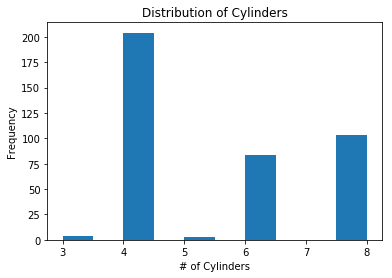

In [13]:
auto_df.groupby("Cylinders")
auto_df['Cylinders'].plot(kind='hist', title="Distribution of Cylinders")
plt.xlabel('# of Cylinders')
plt.show()

##### Create a scatterplot that shows the relationship between horsepower and weight.

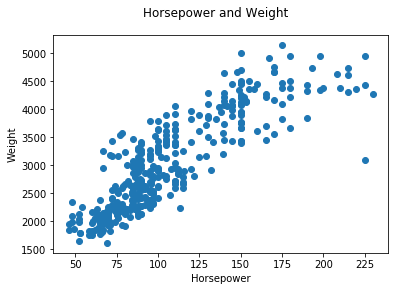

In [12]:
plt.scatter(auto_df['Horsepower'], auto_df['Weight'])
plt.suptitle('Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

As shown in the plot that was graphed through Seaborn and Matplotlib, the linear regression line has a negative slope. As the horsepower decreases, the miles per gallon increases. Based on this graph, the relationship between miles per gallon and horsepower also has a negative correlation.

##### What is the linear regression line that shows a relationship between Weight and Horsepower?

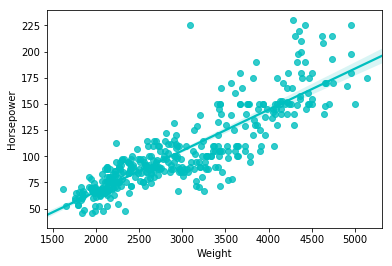

In [14]:
weight_horsepower = sb.regplot(x ='Weight', y = 'Horsepower', data = auto_df, color = 'c')
weight_horsepower.set(xlabel='Weight', ylabel='Horsepower')
plt.show()

In reviewing the plot that was graphed with Seaborn and Matplotlib, the linear regression line move from left to right on an upward curve. The horsepower and the weight both have positive correlation as both increases.